In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

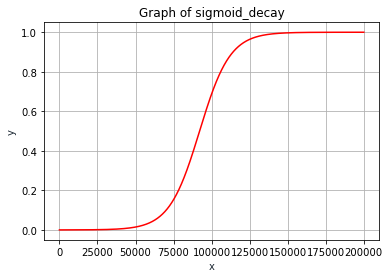

In [4]:
def sigmoid_decay(k, step):
    return k / (k + math.exp(step /k))
def plot_sigmoid(func, k=200000):
    f = partial(func, k)
    x = np.arange(0, 200000)
    y = [1 - f(i) for i in x]
    plt.plot(x, y, '-r')
    plt.title('Graph of sigmoid_decay')
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    # plt.legend(loc='upper left')
    plt.grid()
    plt.show()
    
plot_sigmoid(sigmoid_decay, 10000)

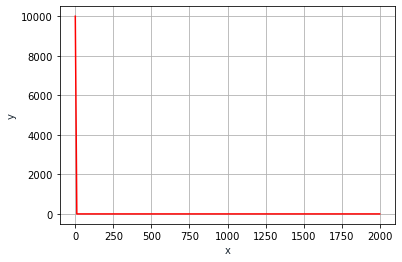

In [73]:
def plot_linear(k=10000, c=1000, p=0.3):
    x = np.arange(0, 2000)
    y = [max(p, k-c*i) for i in x]
    plt.plot(x, y, '-r')
#     plt.title('Graph of sigmoid_decay')
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    # plt.legend(loc='upper left')
    plt.grid()
    plt.show()

plot_linear()

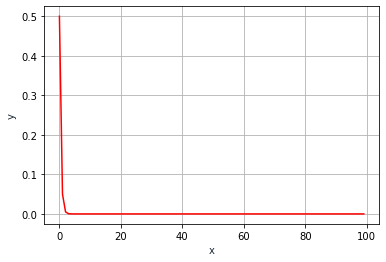

In [70]:
def plot_exp(k=0.1):
    x = np.arange(0, 100)
    y = [0.5*k**i for i in x]
    plt.plot(x, y, '-r')
#     plt.title('Graph of sigmoid_decay')
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    # plt.legend(loc='upper left')
    plt.grid()
    plt.show()

plot_exp()

In [53]:
0.9 ** 1000

1.7478712517226947e-46

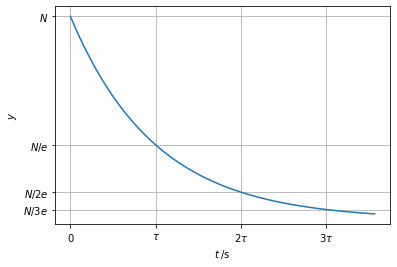

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Initial value of y at t=0, lifetime in s
N, tau = 10000, 28
# Maximum time to consider (s)
tmax = 100
# A suitable grid of time points, and the exponential decay itself
t = np.linspace(0, tmax, 1000)
y = N * np.exp(-t/tau)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, y)

# The number of lifetimes that fall within the plotted time interval
ntau = tmax // tau + 1
# xticks at 0, tau, 2*tau, ..., ntau*tau; yticks at the corresponding y-values
xticks = [i*tau for i in range(ntau)]
yticks = [N * np.exp(-i) for i in range(ntau)]
ax.set_xticks(xticks)
ax.set_yticks(yticks)

# xtick labels: 0, tau, 2tau, ...
xtick_labels = [r'$0$', r'$\tau$'] + [r'${}\tau$'.format(k) for k in range(2,ntau)]
ax.set_xticklabels(xtick_labels)
# corresponding ytick labels: N, N/e, N/2e, ...
ytick_labels = [r'$N$',r'$N/e$'] + [r'$N/{}e$'.format(k) for k in range(2,ntau)]
ax.set_yticklabels(ytick_labels)

ax.set_xlabel(r'$t\;/\mathrm{s}$')
ax.set_ylabel(r'$y$')
ax.grid()
plt.show()

# 学习率
## 学习率的作用
在机器学习中，监督式学习通过定义一个模型，并根据训练集上的数据估计最优参数。梯度下降法是一个广泛被用来最小化模型误差的参数优化算法。梯度下降法通过多次迭代，并在每一步中最小化成本函数（cost 来估计模型的参数。学习率 (learning rate)，在迭代过程中会控制模型的学习进度。

在梯度下降法中，都是给定的统一的学习率，整个优化过程中都以确定的步长进行更新， 在迭代优化的前期中，学习率较大，则前进的步长就会较长，这时便能以较快的速度进行梯度下降，而在迭代优化的后期，逐步减小学习率的值，减小步长，这样将有助于算法的收敛，更容易接近最优解。故而如何对学习率的更新成为了研究者的关注点。

在模型优化中，常用到的几种学习率衰减方法有

1. 分段常数衰减
2. 多项式衰减
3. 指数衰减
4. 自然指数衰减
5. 余弦衰减
6. 线性余弦衰减
7. 噪声线性余弦衰减


## 学习率衰减常用参数有哪些

| 参数名称 | 参数说明
|:-|:-|
| learning_rate | 初始学习率 |
| global_step	| 用于衰减计算的全局步数，非负，用于逐步计算衰减指数 |
| decay_steps	| 衰减步数，必须是正值，决定衰减周期 |
| decay_rate	| 衰减率 |
| end_learning_rate	| 最低的最终学习率 |
| cycle	| 学习率下降后是否重新上升 |
| alpha	| 最小学习率 |
| num_periods	| 衰减余弦部分的周期数 |
| initial_variance	| 噪声的初始方差 |
| variance_decay	| 衰减噪声的方差 |

## 分段常数衰减 (piecewise_constant)

分段常数衰减需要事先定义好的训练次数区间，在对应区间置不同的学习率的常数值，一般情况刚开始的学习率要大一些，之后要越来越小，要根据样本量的大小设置区间的间隔大小，样本量越大，区间间隔要小一点。下图即为分段常数衰减的学习率变化图，横坐标代表训练次数，纵坐标代表学习率。


# Reference

1. [tensorflow中常用学习率更新策略](https://blog.csdn.net/dcrmg/article/details/80017200)
2. [常见学习率衰减方式](https://www.jianshu.com/p/125fe2ab085b)